In [2]:
#将json格式的数据转为dictionary
import json
db = json.load(open('F:/usda_food/database.json'))
db[0].keys()

dict_keys(['manufacturer', 'group', 'id', 'description', 'portions', 'nutrients', 'tags'])

In [9]:
#查看nutrients的具体内容
import pandas as pd
db[0]['nutrients'][:5]#可以看出nutrients是一个dictionary列表

[{'description': 'Protein',
  'group': 'Composition',
  'units': 'g',
  'value': 25.18},
 {'description': 'Total lipid (fat)',
  'group': 'Composition',
  'units': 'g',
  'value': 29.2},
 {'description': 'Carbohydrate, by difference',
  'group': 'Composition',
  'units': 'g',
  'value': 3.06},
 {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
 {'description': 'Energy', 'group': 'Energy', 'units': 'kcal', 'value': 376.0}]

In [11]:
#将nutrients转化为dataframe
pieces = []
for i in range(len(db)):
    frame = pd.DataFrame(db[i]['nutrients'])
    frame['id'] = db[i]['id']
    pieces.append(frame)
nutrients = pd.concat(pieces,axis=0)
nutrients[:5]

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [17]:
#将db中的一些信息提取出来构成dataframe info
info_keys = ['description','group','id','manufacturer']
info = pd.DataFrame(db,columns=info_keys)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [14]:
info.group.value_counts()[:5]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Name: group, dtype: int64

In [18]:
#将info，nutrients通过idmerge
#首先将overlapping的column分别重新命名
col_mapping={'description':'food','group':'fgroup'}
info_rename = info.rename(columns=col_mapping,copy=False)
col_mapping={'description':'nutrient','group':'nutgroup'}
nutrients_rename = nutrients.rename(columns=col_mapping,copy=False)
#融合二者by id
ndata = pd.merge(info_rename,nutrients_rename,on='id',how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389355 entries, 0 to 389354
Data columns (total 8 columns):
food            389355 non-null object
fgroup          389355 non-null object
id              389355 non-null int64
manufacturer    305162 non-null object
nutrient        389355 non-null object
nutgroup        389355 non-null object
units           389355 non-null object
value           389355 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 26.7+ MB


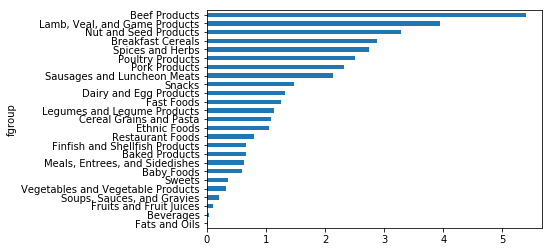

In [36]:
#针对上述ndata进行数据分析
#计算各类food下nutrient的各个组分的mean
import matplotlib.pyplot as plt
result = ndata.groupby(['fgroup','nutrient'])['value'].quantile(0.5)
#计算nutrient ‘Zinc, Zn’，在各个food中的含量
result[:,'Zinc, Zn'].sort_values().plot(kind='barh')#注意书中书写错误，result为double-index series,要抽取某一值result['key1','key2']
#要抽取level1的某一个key值：result['key1'],要抽取Level2的某一个key值：result[:,'key2']
plt.show()

In [43]:
#对于不同类型的nutrient，那种food的含量最高
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
get_maximum = lambda x:x.loc[x.value.idxmax()]#这里用iloc会报错
get_minimum = lambda x:x.loc[x.value.idxmin()]
max_food = by_nutrient.apply(get_maximum)[['value','food']]
max_food.food = max_food.food.str[:50]
max_food.loc['Amino Acids']['food']#index为Amino Acids的food column; #Amino Acids类下各个nutrients含量最高的food名称

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 